# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie:

---

# Zestaw zadań 9: Weryfikacja hipotez statystycznych - testy parametryczne

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [2]:
def vizualize_test_result(pdf, statistic, rejection_region):

    pdf_name= pdf.columns[0]
    
    fig, axes = plt.subplots(1, 1, figsize=(8, 3), facecolor='white')

    axes.plot(pdf.index, pdf[pdf_name], color="grey")

    if rejection_region[2]=="inner":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index > rejection_region[0]) & (pdf.index<rejection_region[1])), color='red', alpha=0.5)
    elif rejection_region[2]=="outer":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index < rejection_region[0]) | (pdf.index>rejection_region[1])), color='red', alpha=0.5)
    
    axes.vlines(x=statistic, ymin=0, ymax=np.max(pdf["pdf"]/3), color="blue")
    
    axes.set_xlabel(pdf.index.name)
    axes.set_ylabel(pdf_name)

### Dane do zadań 1-3

W celu wygenerowania danych wykorzystywanych w zawartych w notatniku komórkach testowych wykonaj obie poniższe komórki.

In [4]:
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["X"])
test_data_1.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [3]:
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=-0.15, scale=0.2, size=100, random_state=12)>0, columns=["X"])
test_data_2.head()

,X
0,False
1,False
2,False
3,False
4,True


### Zadanie 1: Weryfikacja hipotezy o wartości przeciętnej [7 pkt]

Przygotuj funkcję `mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
def mean_NHST(data, H0, H1, alpha):
    n = len(data['X'])
    s = np.std(data['X']) #1/(n-ddof)
    t = (np.mean(data['X'] - H0))/s*np.sqrt(n-1)
    a = sp.stats.t.ppf(0.0001, df=n-1)
    b = sp.stats.t.ppf(0.9999, df=n-1)
    x = np.linspace(a, b, 100)
    fx = sp.stats.t.pdf(x, df=n-1)
    pdf = pd.DataFrame({'pdf': fx, 'x': x})
    if H1=="two-sided":
        t_alpha = sp.stats.t.ppf(1-alpha/2, n-1)
        if abs(t) >= t_alpha:
            vizualize_test_result(pdf, t, [-t_alpha, t_alpha, 'outer'])
            return t, t_alpha, 1
        vizualize_test_result(pdf, t, [-t_alpha, t_alpha, 'outer'])
        return t, t_alpha, 0
    elif H1=="less":
        t_alpha = sp.stats.t.ppf(alpha, n-1)
        if t <= t_alpha:
            vizualize_test_result(pdf, t, [-np.inf, t_alpha, 'inner'])
            return t, t_alpha, 1
        vizualize_test_result(pdf, t, [-np.inf, t_alpha, 'inner'])
        return t, t_alpha, 0
    elif H1=="greater":
        t_alpha = sp.stats.t.ppf(1-alpha, n-1)
        if t >= t_alpha:
            vizualize_test_result(pdf, t, [t_alpha, np.inf, 'inner'])
            return t, t_alpha, 1
        vizualize_test_result(pdf, t, [t_alpha, np.inf, 'inner'])
        return t, t_alpha, 0

    



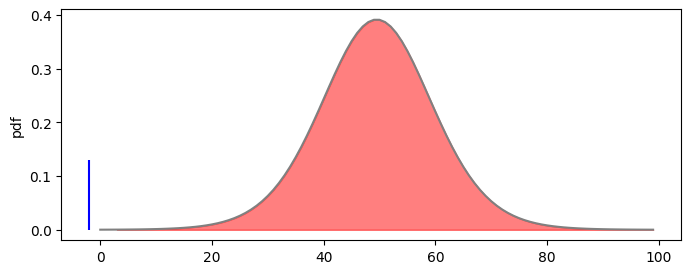

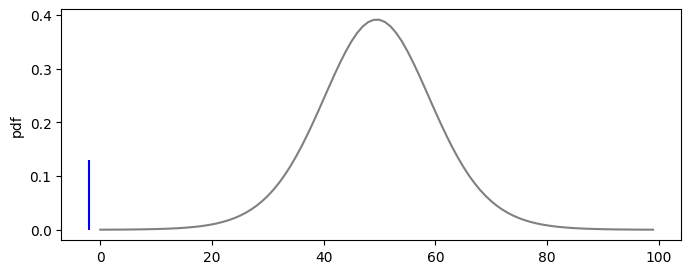

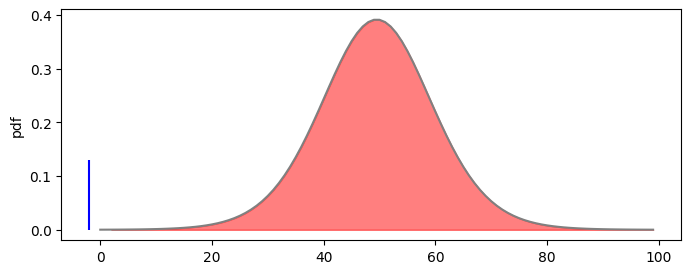

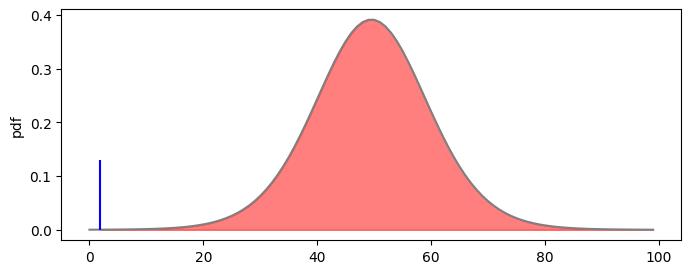

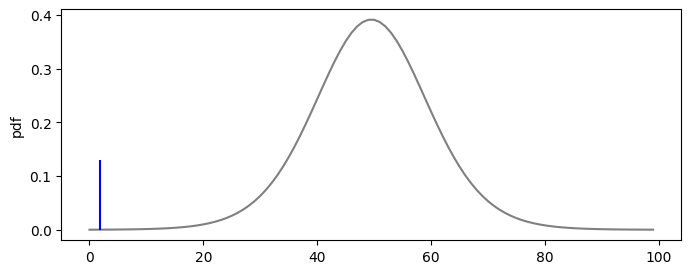

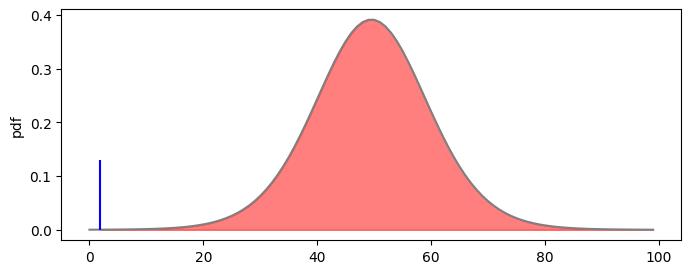

In [8]:
### Komórka testowa
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "two-sided", 0.05), (-1.9346677837081263, 2.1447866879169273, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "less", 0.05), (-1.9346677837081263, -1.7613101357748564, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 5.08, "greater", 0.05), (-1.9346677837081263, 1.7613101357748562, 0)))

assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "two-sided", 0.1), (1.8994107469740968, 1.7613101357748562, 1)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "less", 0.1), (1.8994107469740968, -1.3450303744546486, 0)))
assert np.all(np.isclose(mean_NHST(test_data_1, 4.92, "greater", 0.1), (1.8994107469740968, 1.345030374454649, 1)))

### Zadanie 2: Weryfikacja hipotezy o wariancji [8 pkt]

Przygotuj funkcję `variance_NHST()`, która będzie weryfikować hipotezę o wartości wariancji i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [27]:
def variance_NHST(data, H0, H1, alpha):
    n = len(data['X'])
    s = np.std(data['X'], ddof=1) # uwzględniamy stopnie swobody
    chi2 = (n - 1) * (s ** 2) / H0
    # do wizualizacji 
    a = sp.stats.chi2.ppf(0.0001, df=n-1)
    b = sp.stats.chi2.ppf(0.9999, df=n-1)
    x = np.linspace(a, b, 100)
    fx = sp.stats.chi2.pdf(x, df=n-1)
    pdf = pd.DataFrame({'pdf': fx, 'x': x})
    
    if H1 == "two-sided":
        chi2_alpha_1 = stats.chi2.ppf(alpha / 2, n - 1)
        chi2_alpha_2 = stats.chi2.ppf(1 - alpha / 2, n - 1)
        if chi2 >= chi2_alpha_2 or chi2 <= chi2_alpha_1:
            vizualize_test_result(pdf, chi2, [chi2_alpha_1, chi2_alpha_2, 'outer'])
            return chi2, (chi2_alpha_1, chi2_alpha_2), 1
        vizualize_test_result(pdf, chi2, [chi2_alpha_1, chi2_alpha_2, 'outer'])
        return chi2, (stats.chi2.ppf(alpha / 2, n - 1), chi2_alpha_2), 0
    elif H1 == "less":
        chi2_alpha = stats.chi2.ppf(alpha, n - 1)
        if chi2 <= chi2_alpha:
            vizualize_test_result(pdf, chi2, [-np.inf, chi2_alpha, 'inner'])
            return chi2, chi2_alpha, 1
        vizualize_test_result(pdf, chi2, [-np.inf, chi2_alpha, 'inner'])
        return chi2, chi2_alpha, 0
    elif H1 == "greater":
        chi2_alpha = stats.chi2.ppf(1 - alpha, n - 1)
        if chi2 >= chi2_alpha:
            vizualize_test_result(pdf, chi2, [chi2_alpha, np.inf, 'inner'])
            return chi2, chi2_alpha, 1
        vizualize_test_result(pdf, chi2, [chi2_alpha, np.inf, 'inner'])
        return chi2, chi2_alpha, 0
    


In [28]:
### Komórka testowa
results = variance_NHST(test_data_1, 0.1, "two-sided", 0.05)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (3.657103504858619, 5.628726103039731, 26.11894804503737, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "less", 0.05), (3.657103504858619, 6.570631383789345, 1)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.1, "greater", 0.05), (3.657103504858619, 23.684791304840576, 0)))

results = variance_NHST(test_data_1, 0.013, "two-sided", 0.02)
assert np.all(np.isclose((results[0], results[1][0], results[1][1], results[2]), (28.13156542198938, 4.660425062657768, 29.141237740672796, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "less", 0.02), (28.13156542198938, 5.368197419889671, 0)))
assert np.all(np.isclose(variance_NHST(test_data_1, 0.013, "greater", 0.02), (28.13156542198938, 26.872764642314312, 1)))

### Zadanie 3: Weryfikacja hipotezy o wskaźniku struktury (proporcji) [7 pkt]

Przygotuj funkcję `proportion_NHST()`, która będzie weryfikować hipotezę o wartości wskaźnika struktury (proporcji) i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w dołączonym do notatnika zestawie wzorów, w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

In [16]:
def proportion_NHST(data, H0, H1, alpha):
    n = len(data['X'])
    p_hat = data[data['X'] == 1].shape[0]/data.shape[0]
    z = (p_hat - H0) / np.sqrt(H0 * (1 - H0) / n)
    
    a = sp.stats.norm.ppf(0.0001)
    b = sp.stats.norm.ppf(0.9999)
    x = np.linspace(a, b, 100)
    fx = sp.stats.norm.pdf(x)
    pdf = pd.DataFrame({'pdf': fx, 'x': x})
    if H1 == "two-sided":
        z_alpha_2 = stats.norm.ppf(1 - alpha / 2)
        if np.abs(z) >= z_alpha_2:
            vizualize_test_result(pdf, z, [-z_alpha_2, z_alpha_2, 'outer'])
            return z, z_alpha_2, 1
        vizualize_test_result(pdf, z, [-z_alpha_2, z_alpha_2, 'outer'])
        return z, z_alpha_2, 0
    elif H1 == "less":
        z_alpha = stats.norm.ppf(alpha)
        if z <= z_alpha:
            vizualize_test_result(pdf, z, [-np.inf, z_alpha, 'inner'])
            return z, z_alpha, 1
        vizualize_test_result(pdf, z, [-np.inf, z_alpha, 'inner'])
        return z, z_alpha, 0
    elif H1 == "greater":
        z_alpha = stats.norm.ppf(1 - alpha)
        if z >= z_alpha:
            vizualize_test_result(pdf, z, [z_alpha, np.inf, 'inner'])
            return z, z_alpha, 1
        vizualize_test_result(pdf, z, [z_alpha, np.inf, 'inner'])
        return z, z_alpha, 0
    
    
    


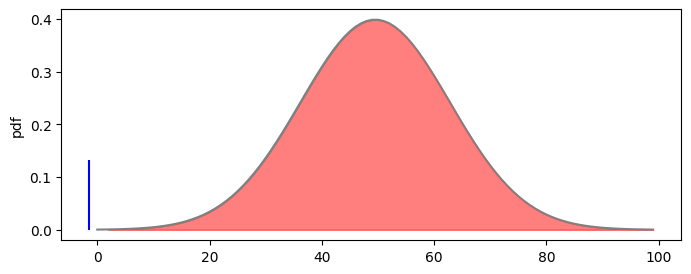

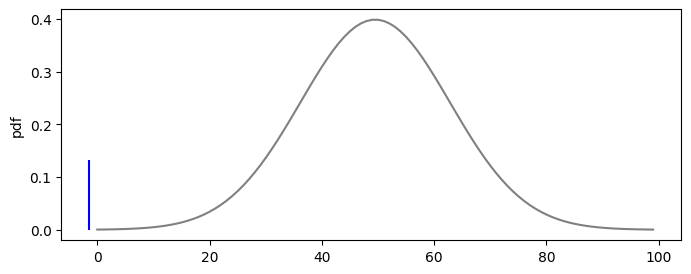

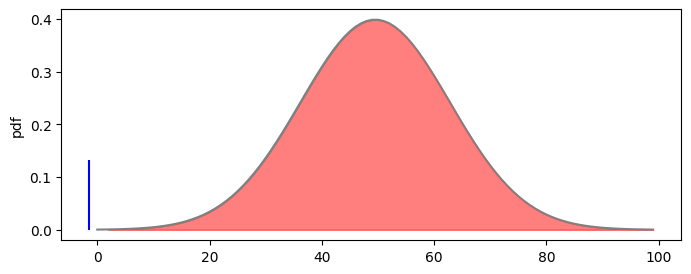

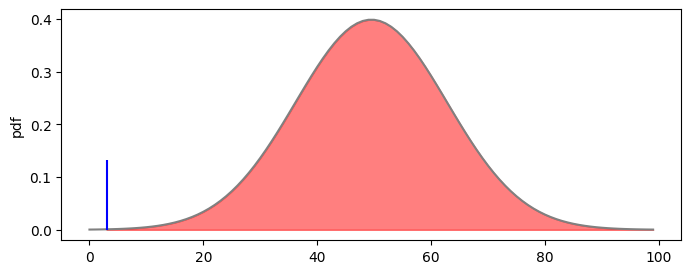

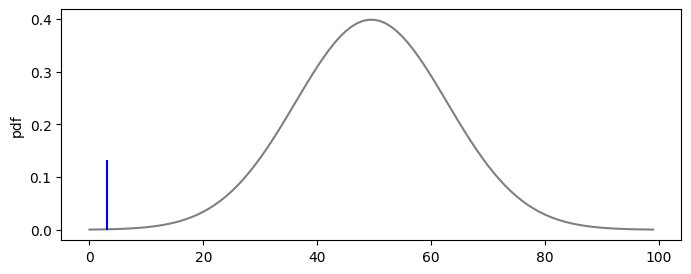

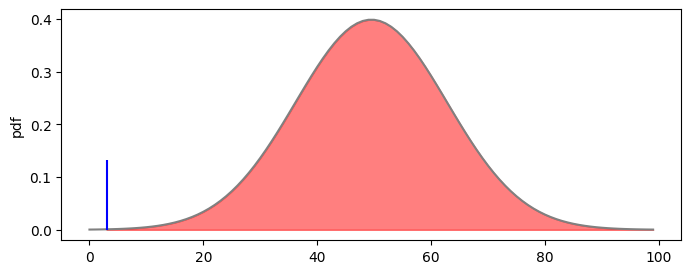

In [17]:
### Komórka testowa
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "two-sided", 0.1), (-1.3856406460551018, 1.6448536269514722, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "less", 0.1), (-1.3856406460551018, -1.2815515655446004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.25, "greater", 0.1), (-1.3856406460551018, 1.2815515655446004, 0)))

assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "two-sided", 0.01), (2.9999999999999996, 2.5758293035489004, 1)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "less", 0.01), (2.9999999999999996, -2.3263478740408408, 0)))
assert np.all(np.isclose(proportion_NHST(test_data_2, 0.1, "greater", 0.01), (2.9999999999999996, 2.3263478740408408, 1)))

### Zadanie 4: Weryfikacja hipotez z wykorzystaniem dedykowanych funkcji [6 pkt]

#### a) Rzut monetą
Zmienna `coin_toss_sample` zawiera wyniki 50 rzutów monetą. Korzystając z funkcji `scipy.stats.binomtest()` zweryfikuj hipotezę, że moneta jest uczciwa (prawdopodobieństwo wyrzucenia orła i reszki jest równe). W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_1`, oraz przygotuj zmienną `H_1` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [8]:
coin_toss_sample = ['O', 'R', 'O', 'O', 'R', 'R', 'O', 'R', 'O', 'O',
                    'O', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O', 'R',
                    'R', 'R', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O',
                    'R', 'O', 'R', 'O', 'R', 'O', 'O', 'O', 'R', 'O',
                    'O', 'O', 'O', 'O', 'R', 'O', 'R', 'O', 'O', 'O']

In [9]:
pvalue_1 = sp.stats.binomtest(coin_toss_sample.count("O"),len(coin_toss_sample),p = 0.5,alternative = "two-sided").pvalue
if pvalue_1 <= 0.05:
    H_1 = 1           # mniejsze czyli odrzucamy 0 na rzecz 1 
else:
    H_1 = 0           # mniejsze czyli zostawiamy 0  

In [10]:
### Komórka testowa
assert np.isclose(pvalue_1, 0.032839137564268484)
assert H_1 == 1

#### b) Średnia waga elementów schodzących z linii produkcyjnych

Zmienne `weights_1` oraz `weights_2` zawierają wagi elementów (podane w gramach) losowo zdjętych z dwóch linii produkcyjnych.

In [16]:
weights_1 = [525, 485, 515, 510, 496, 512, 521, 524, 501, 517, 498, 503, 499, 477, 493, 487, 512, 505, 483, 507] 
weights_2 = [523, 515, 519, 524, 498, 508, 502, 509, 513, 521, 516, 519, 497, 521, 498, 518, 526, 497, 494, 506]

Korzystając z funkcji `scipy.stats.ttest_1samp()` zweryfikuj hipotezę, że średnia waga elementów schodzących z pierwszej linii produkcyjnej jest równa 0.5kg względem hipotezy alternatywnej, że średnia waga elementów schodzących z pierwszej linii produkcyjnej jest wyższa od 0.5kg. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.9.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_2`, oraz przygotuj zmienną `H_2` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [17]:
# YOUR CODE HERE
pvalue_2 = sp.stats.ttest_1samp(weights_1,500,alternative = "greater").pvalue # pvalue
if pvalue_2 <= 0.05:
    H_2 = 1
else:
    H_2 = 0

In [18]:
### Komórka testowa
assert np.isclose(pvalue_2, 0.13688813254569193)
assert H_2 == 0

Korzystając z funkcji `scipy.stats.ttest_rel()` zweryfikuj hipotezę, że średnie wagi elementów schodzących z obu linii produkcyjnych są identyczne, względem hipotezy alternatywnej, że średnia waga elementów schodzących z drugiej linii produkcyjnej jest wyższa niż z pierwszej linii. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.98.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_3`, oraz przygotuj zmienną `H_3` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [1]:
# YOUR CODE HERE
pvalue_3 = sp.stats.ttest_rel(weights_1,weights_2,alternative="greater").pvalue
if pvalue_3 <= 0.02:
    H_3 = 1
else:
    H_3 = 0

NameError: name 'sp' is not defined

In [15]:
### Komórka testowa
assert np.isclose(pvalue_3, 0.019512297706307014)
assert H_3 == 1